In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import numpy as np
import json

# generated by kiteco/local-pipelines/python-offline-metrics/cmds/comp-log-analysis
REPORT_FILENAME = "comp-log-info.json"

def preprocess(obj):
    return obj

def get_data(filename):
    records = [preprocess(json.loads(line))
              for line in open(filename, 'r').readlines()]
    return pd.io.json.json_normalize(records)
    
def render(df):
    def make_link(url):
        return '<a href="{}">{}</a>'.format(url, "inspect")
    return df.style.format({'inspect': make_link})

df = get_data(REPORT_FILENAME)
N = len(df.index)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518435 entries, 0 to 518434
Data columns (total 5 columns):
blank_line               518435 non-null bool
col_percent_of_line      518435 non-null float64
cursor                   518435 non-null int64
length                   518435 non-null int64
line_percent_of_total    518435 non-null float64
dtypes: bool(1), float64(2), int64(2)
memory usage: 16.3 MB


In [2]:
# percent of users who are getting completions on the last line

len(df[df.line_percent_of_total >= 1]) / len(df)

0.22247533441993692

In [3]:
# percent of users who are getting completions at the end of the current line

len(df[df.col_percent_of_line >= 1]) / len(df)

0.5915476385660691

In [4]:
# percent of users who are getting completions at the end of the buffer

len(df[(df.col_percent_of_line >= 1) & (df.line_percent_of_total >= 1)]) / len(df)

0.15973072805655483

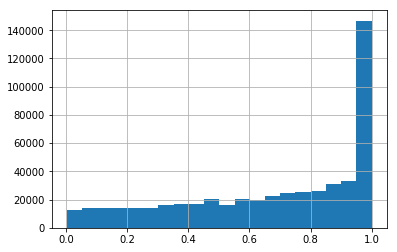

In [5]:
df.line_percent_of_total.hist(bins=20)

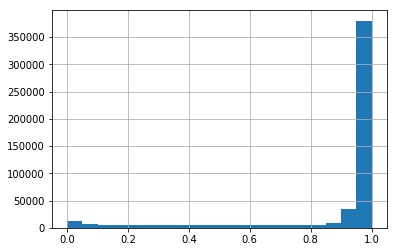

In [6]:
df.col_percent_of_line.hist(bins=20)